#**Import the data**

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle


In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d deepnews/fakenews-reddit-comments

 98% 281M/287M [00:18<00:00, 20.8MB/s]
100% 287M/287M [00:18<00:00, 16.5MB/s]


In [ ]:
!unzip /content/fakenews-reddit-comments.zip

Archive:  /content/fakenews-reddit-comments.zip
  inflating: fake_news_reddit_cikm20.json  


#**Import libraries**

In [ ]:
import time
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

import string

from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Deep learning libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM , GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelBinarizer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#**Read the data**

In [ ]:
#read the data
df = pd.read_json("/content/fake_news_reddit_cikm20.json")
df


,label,reddit_comments,researched_by,text,title,url
0,0,[],snopes,analyze videos growth watch videos growth sinc...,vidinfo,http://www.vidinfo.org/video/67155269/jeremy-m...
1,1,[],snopes,last week current administration missed point ...,editorial misinterpreted toon unpatriotic,http://pittnews.com/30440/archives/editorial-m...
2,0,[],snopes,email protected member male join date jul 2001...,general health message board,http://www.healthboards.com/boards/general-hea...
3,1,[],snopes,urban outfitters sunk new low vintage kent sta...,urban outfitters sorry selling kent state swea...,http://gothamist.com/2014/09/15/urban_outfitte...
4,1,[],snopes,santa goes many names santa claus st nick kris...,story santa claus,http://www.englishteachermelanie.com/canada-fu...
...,...,...,...,...,...,...
69391,0,"[{'created_utc': 1370998152, 'label': 0, 'auth...",snopes,donate stuff 101 places clutter good book joy ...,donate stuff 101 places clutter good miss mini...,http://www.missminimalist.com/2011/04/where-to...
69392,0,[],snopes,update 3272012 painting depicts obama burning ...,finally obama original birth certificate surfaces,http://geopolitics.co/2012/03/21/finally-obama...
69393,0,[],snopes,take selena movie quiz need go back watch movi...,selena quintanilla news 2014,http://loveselena.com/News/2014.html
69394,0,[],snopes,robert well know love ya wants love do ray rob...,tropes q z everybody loves raymond,http://tvtropes.org/pmwiki/pmwiki.php/Everybod...


#**Data Exploration**

In [ ]:
#display the data shape
df.shape

(69396, 6)

In [ ]:
#display data columns
df.columns

Index(['label', 'reddit_comments', 'researched_by', 'text', 'title', 'url'], dtype='object')

In [ ]:
#check missing values
df.isnull().sum()

label              0
reddit_comments    0
researched_by      0
text               0
title              0
url                0
dtype: int64

In [ ]:
#display some data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69396 entries, 0 to 69395
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   label            69396 non-null  int64 
 1   reddit_comments  69396 non-null  object
 2   researched_by    69396 non-null  object
 3   text             69396 non-null  object
 4   title            69396 non-null  object
 5   url              69396 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.2+ MB


In [ ]:
#display data statistical summary
df.describe()

,label
count,69396.000000
mean,0.256081
std,0.436470
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
#display data catigorical summary
df.describe(include='O')

,reddit_comments,researched_by,text,title,url
count,69396,69396,69396,69396,69396
unique,5235,3,67364,64302,69396
top,[],snopes,trendolizer trendolizer patent pending automat...,,http://www.vidinfo.org/video/67155269/jeremy-m...
freq,64161,67285,289,463,1


**"label" column**

In [ ]:
#display label catigories & their counts
df.label.value_counts()

0    51625
1    17771
Name: label, dtype: int64

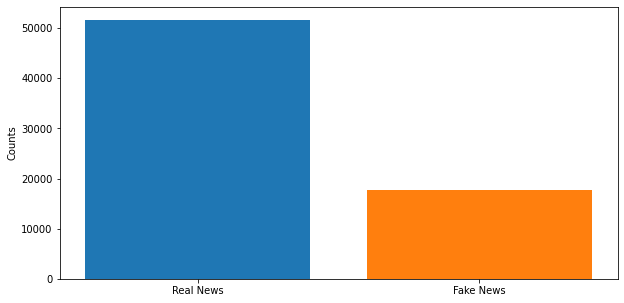

In [ ]:
Real_news = df[df["label"]==0].values
fake_news = df[df["label"]==1].values
plt.bar(0,height=len(Real_news))
plt.bar(1,height=len(fake_news))
plt.xticks([0,1],["Real News","Fake News"])
plt.ylabel("Counts")
plt.show()

**"researched_by" column**

In [ ]:
#display unique values
df.researched_by.unique()

array(['snopes', 'politifact', 'emergent'], dtype=object)

In [ ]:
#display value counts for each unique value
df.researched_by.value_counts()

snopes        67285
politifact     1460
emergent        651
Name: researched_by, dtype: int64

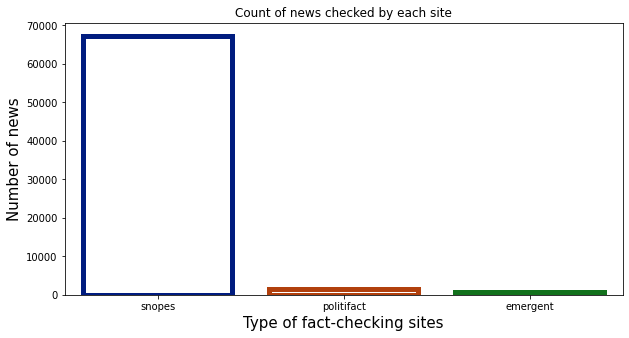

In [ ]:
#Plotting the frequency plot
ax = sns.countplot(x="researched_by", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

#Setting labels and font size
ax.set(xlabel='Type of fact-checking sites', ylabel='Number of news',title='Count of news checked by each site')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

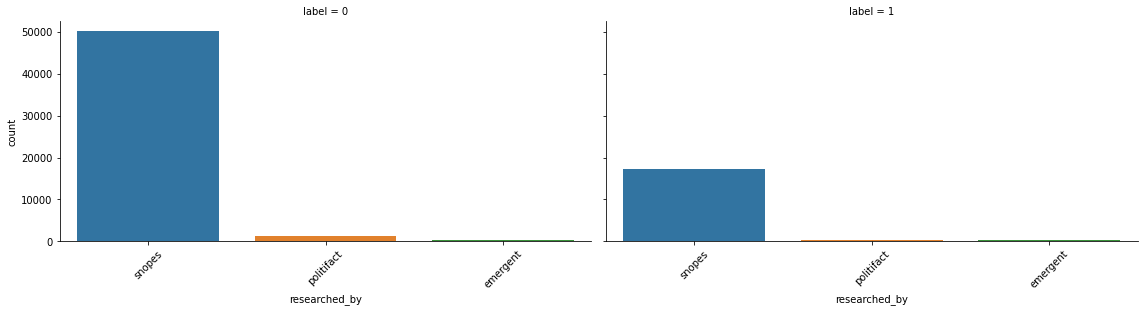

In [ ]:
g = sns.catplot(x="researched_by", col="label",data=df, kind="count",height=4, aspect=2)
#Rotating the xlabels
g.set_xticklabels(rotation=45);

#**1) Hypothesis Test Question**

**The question is:** *Is the ratio of fake news in Emergent fact-checking site significantly higher than the ratio of fake news by all
other fact-checking sites?*

In [ ]:
#display the value counts of researched_by column
df['researched_by'].value_counts()

snopes        67285
politifact     1460
emergent        651
Name: researched_by, dtype: int64

In [ ]:
import scipy.stats as stats

stats.f_oneway(df['label'][df['researched_by'] == 'snopes'],
               df['label'][df['researched_by'] == 'politifact'],
               df['label'][df['researched_by'] == 'emergent'])

F_onewayResult(statistic=89.8368765501599, pvalue=1.0833362861337408e-39)

**H0:** the three means different are equal 

**H1:** the three means different are equal (Emergent fact-checking site significantly higher than the ratio of fake news by all
other fact-checking sites)

As pvalue is so small we should reject H0 (<.05)

#**2) Regression Question (Predicting the number of user comments for each news)**
We will extracte the length of comments of each news as a new feature, then used it as label to predict later the expected number of comments on each news and applied this through 2 scenarios:

• **1:** Using the whole data ( 69396 rows) that has missing values in reddit_comments column assuming that the remained news have no comments (0).

• **2:** Using part of the data that has comments on each news without the ones that has missing values assuming that their comments are missed, so delete them, and use that 5235 rows to train/test our model.

##**First scenario**


###**Columns preprocessing**

####**reddit_comments**

In [ ]:
#drop missing values from reddit_comments creating new dataframe called(df2)
df2=df.copy()
df2.head()


,label,reddit_comments,researched_by,text,title,url
0,0,[],snopes,analyze videos growth watch videos growth sinc...,vidinfo,http://www.vidinfo.org/video/67155269/jeremy-m...
1,1,[],snopes,last week current administration missed point ...,editorial misinterpreted toon unpatriotic,http://pittnews.com/30440/archives/editorial-m...
2,0,[],snopes,email protected member male join date jul 2001...,general health message board,http://www.healthboards.com/boards/general-hea...
3,1,[],snopes,urban outfitters sunk new low vintage kent sta...,urban outfitters sorry selling kent state swea...,http://gothamist.com/2014/09/15/urban_outfitte...
4,1,[],snopes,santa goes many names santa claus st nick kris...,story santa claus,http://www.englishteachermelanie.com/canada-fu...


In [ ]:
#extact the bodies & their lengths(number of comments on each news) from reddit_comments column
bodies=[]
lengths =[]
for i in df2.index:
  bodies.append([x['body'] for x in df2['reddit_comments'][i]])
  lengths.append(len([x['body'] for x in df2['reddit_comments'][i]]))
#adding the new columns to the dataframe
df2['bodies']=bodies
df2['lengths']=lengths 

In [ ]:
df2.tail()

,label,reddit_comments,researched_by,text,title,url,bodies,lengths
69391,0,"[{'created_utc': 1370998152, 'label': 0, 'auth...",snopes,donate stuff 101 places clutter good book joy ...,donate stuff 101 places clutter good miss mini...,http://www.missminimalist.com/2011/04/where-to...,[great post im hoping obtain minimal lifestyle...,8
69392,0,[],snopes,update 3272012 painting depicts obama burning ...,finally obama original birth certificate surfaces,http://geopolitics.co/2012/03/21/finally-obama...,[],0
69393,0,[],snopes,take selena movie quiz need go back watch movi...,selena quintanilla news 2014,http://loveselena.com/News/2014.html,[],0
69394,0,[],snopes,robert well know love ya wants love do ray rob...,tropes q z everybody loves raymond,http://tvtropes.org/pmwiki/pmwiki.php/Everybod...,[],0
69395,0,"[{'created_utc': 1436457724, 'label': 0, 'auth...",snopes,children crayons marketed colorful characters ...,child coloring asbestos,http://www.scientificamerican.com/article/is-y...,"[deleted, whether airborne not exposure asbest...",2


In [ ]:
#remove the unwanted strings and empty bodies(deleted)
unwanted_strings=['       ','        ',""," ","deleted","nan"]
for i in df2.index:
  df2['bodies'][i] = [x for x in df2['bodies'][i] if x not in unwanted_strings]

In [ ]:
#recalculate the number of comments(lengths) after removing the unwanted strings & empty comments(deleted)
for i in df2.index:
  df2['lengths'][i]=len([x for x in df2['bodies'][i]])

In [ ]:
df2.tail()

,label,reddit_comments,researched_by,text,title,url,bodies,lengths
69391,0,"[{'created_utc': 1370998152, 'label': 0, 'auth...",snopes,donate stuff 101 places clutter good book joy ...,donate stuff 101 places clutter good miss mini...,http://www.missminimalist.com/2011/04/where-to...,[great post im hoping obtain minimal lifestyle...,7
69392,0,[],snopes,update 3272012 painting depicts obama burning ...,finally obama original birth certificate surfaces,http://geopolitics.co/2012/03/21/finally-obama...,[],0
69393,0,[],snopes,take selena movie quiz need go back watch movi...,selena quintanilla news 2014,http://loveselena.com/News/2014.html,[],0
69394,0,[],snopes,robert well know love ya wants love do ray rob...,tropes q z everybody loves raymond,http://tvtropes.org/pmwiki/pmwiki.php/Everybod...,[],0
69395,0,"[{'created_utc': 1436457724, 'label': 0, 'auth...",snopes,children crayons marketed colorful characters ...,child coloring asbestos,http://www.scientificamerican.com/article/is-y...,[whether airborne not exposure asbestos child ...,1


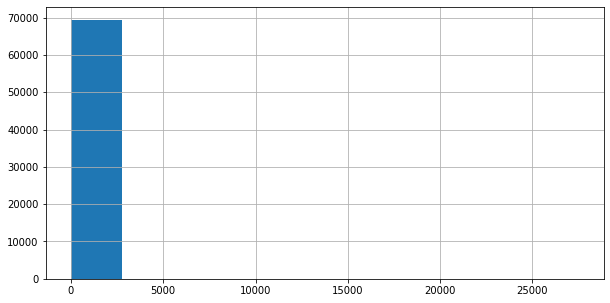

In [ ]:
#display the distribution of number of comments per each news
df2['lengths'].hist();

####**url**


In [ ]:
#The URL parsing functions to split a URL string into its components
from urllib.parse import urlparse
df2['clean_url'] = df2['url'].astype('str').apply(lambda x: urlparse(x)[1])

In [ ]:
#remove the dot character
for i in df2.index:
  df2['clean_url'][i]=df2['clean_url'][i].replace('.' , ' ')
df2['clean_url']

0                      www vidinfo org
1                         pittnews com
2                 www healthboards com
3                        gothamist com
4        www englishteachermelanie com
                     ...              
69391           www missminimalist com
69392                   geopolitics co
69393                   loveselena com
69394                     tvtropes org
69395       www scientificamerican com
Name: clean_url, Length: 69396, dtype: object

####**title**

In [ ]:
#Building function for Cleaning any passed text
nltk.download('punkt')
nltk.download('stopwords')

stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))


def clean_text(text, for_embedding=False):
    """ steps:
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)

    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)
    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    clean_text = " ".join(words_filtered)
    return clean_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#applying the first cleaning function on title column 
#and put the output of this cleaning process in new column("clean_title")
%%time
# Clean text in train data (1.45 s)
df2["clean_title"] = df2.loc[df2["title"].str.len() > 0, "title"]
df2["clean_title"] = df2["clean_title"].map(lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x)
df2['clean_title']=df2['clean_title'].replace(np.nan , " " )

CPU times: user 13.2 s, sys: 7.49 ms, total: 13.2 s
Wall time: 13.2 s


In [ ]:
df2.head()

,label,reddit_comments,researched_by,text,title,url,bodies,lengths,clean_url,clean_title
0,0,[],snopes,analyze videos growth watch videos growth sinc...,vidinfo,http://www.vidinfo.org/video/67155269/jeremy-m...,[],0,www vidinfo org,vidinfo
1,1,[],snopes,last week current administration missed point ...,editorial misinterpreted toon unpatriotic,http://pittnews.com/30440/archives/editorial-m...,[],0,pittnews com,editori misinterpret toon unpatriot
2,0,[],snopes,email protected member male join date jul 2001...,general health message board,http://www.healthboards.com/boards/general-hea...,[],0,www healthboards com,general health messag board
3,1,[],snopes,urban outfitters sunk new low vintage kent sta...,urban outfitters sorry selling kent state swea...,http://gothamist.com/2014/09/15/urban_outfitte...,[],0,gothamist com,urban outfitt sorri sell kent state sweatshirt...
4,1,[],snopes,santa goes many names santa claus st nick kris...,story santa claus,http://www.englishteachermelanie.com/canada-fu...,[],0,www englishteachermelanie com,stori santa claus


###**Create new DataFrame from our new features**

In [ ]:
#concate the text features that we will use into one column(content column)
train=pd.DataFrame()
df2['content']= df2['researched_by']+' '+df2['clean_title']+ ' '+ df2['clean_url']

In [ ]:
df2.head()

,label,reddit_comments,researched_by,text,title,url,bodies,lengths,clean_url,clean_title,content
0,0,[],snopes,analyze videos growth watch videos growth sinc...,vidinfo,http://www.vidinfo.org/video/67155269/jeremy-m...,[],0,www vidinfo org,vidinfo,snopes vidinfo www vidinfo org
1,1,[],snopes,last week current administration missed point ...,editorial misinterpreted toon unpatriotic,http://pittnews.com/30440/archives/editorial-m...,[],0,pittnews com,editori misinterpret toon unpatriot,snopes editori misinterpret toon unpatriot pit...
2,0,[],snopes,email protected member male join date jul 2001...,general health message board,http://www.healthboards.com/boards/general-hea...,[],0,www healthboards com,general health messag board,snopes general health messag board www healthb...
3,1,[],snopes,urban outfitters sunk new low vintage kent sta...,urban outfitters sorry selling kent state swea...,http://gothamist.com/2014/09/15/urban_outfitte...,[],0,gothamist com,urban outfitt sorri sell kent state sweatshirt...,snopes urban outfitt sorri sell kent state swe...
4,1,[],snopes,santa goes many names santa claus st nick kris...,story santa claus,http://www.englishteachermelanie.com/canada-fu...,[],0,www englishteachermelanie com,stori santa claus,snopes stori santa claus www englishteachermel...


These models are the TF-IDF Model, N-Gram Model, Bag of Words Model. These models extract the features from the training data set and then the classifier is trained through these features. 

In [ ]:
"""
Compute unique word vector with frequencies
exclude very uncommon (<10 obsv.) and common (>=40%) words
use pairs of three words (ngram)
and max_features equal to 40000 features
"""
vectorizer_word = TfidfVectorizer( max_features=40000, analyzer="word", max_df=0.4, min_df=10, ngram_range=(1, 3), norm="l2")
X = vectorizer_word.fit_transform(df2['content'])


#concate the vectorised output and our label(comment length on each news) in one dataframe(df_train)
from scipy.sparse import csr_matrix
df_train = pd.DataFrame.sparse.from_spmatrix(X)
df_train.index=df2.index
df_train['lengths']= df2['lengths']

df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,14208,14209,14210,14211,14212,14213,14214,14215,14216,lengths
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


####**Split data**

In [ ]:
X= df_train.iloc[:,:-1]
Y= df_train['lengths']

In [ ]:
# Further split the original training set to a train and a validation set
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 42) 

In [ ]:
print(X_train.shape)
print(X_test.shape)

(55516, 14217)
(13880, 14217)


In [ ]:
print(X_train.shape) 
print(Y_train.shape) 

(55516, 14217)
(55516,)


###**Regression models**

In [ ]:
def model_diagnostics(model, pr=True):
    """
    Returns and prints the R-squared, RMSE and the MAE for a trained model
    """
    y_predicted = model.predict(X_test)
    r2 = r2_score(Y_test, y_predicted)
    mse = mean_squared_error(Y_test, y_predicted)
    mae = mean_absolute_error(Y_test, y_predicted)
    if pr:
        print(f"R-Sq: {r2:.4}")
        print(f"MSE: {mse}")
        print(f"MAE: {mae}")
    
    return [r2,mse,mae]
    
def new_model_diagnostics(model, pr=True):
    """
    Returns and prints the R-squared, RMSE and the MAE for a trained model
    after converting prediction values that less than zero to zero
    """
    y_predicted = model.predict(X_test)
    for i in range(len(y_predicted)):
        if (y_predicted[i]<0):
           y_predicted[i]=0

    r2 = r2_score(Y_test, y_predicted)
    mse = mean_squared_error(Y_test, y_predicted)
    mae = mean_absolute_error(Y_test, y_predicted)
    if pr:
        print(f"R-Sq: {r2:.4}")
        print(f"MSE: {mse}")
        print(f"MAE: {mae}")
    
    return [r2,mse,mae]

def plot_residuals(y_test, y_predicted):
    """"
    Plots the distribution for actual and predicted values of the target variable. Also plots the distribution for the residuals
    """
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)
    sns.distplot(y_test, ax=ax0, kde = False)
    ax0.set(xlabel='Test scores')
    sns.distplot(y_predicted, ax=ax1, kde = False)
    ax1.set(xlabel="Predicted scores")
    plt.show()
    fig, ax2 = plt.subplots()
    sns.distplot((y_test-y_predicted), ax = ax2,kde = False)
    ax2.set(xlabel="Residuals")
    plt.show()
    
def y_test_vs_y_predicted(y_test,y_predicted):
    """
    Produces a scatter plot for the actual and predicted values of the target variable
    """
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_predicted)
    ax.set_xlabel("Test Scores")
    ax.set_ylim([-75, 1400])
    ax.set_ylabel("Predicted Scores")
    plt.show()

In [ ]:
#dictionary to save results from our models
model_performance_dict = dict()
#dictionary to save results from our models (after converting prediction values that less than zero)
new_model_performance_dict= dict()

###**Before converting the predicted values that less than zero to zero**

####**Linear Regression Models**

**Baseline model**

In [ ]:
baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train,Y_train)
model_performance_dict["Baseline"] = model_diagnostics(baseline)

R-Sq: -3.896e-05
MSE: 14107.778574982127
MAE: 16.244761662811126


**Linear Regression**

In [ ]:
linear = LinearRegression()
linear.fit(X_train,Y_train)
model_performance_dict["Linear Regression"] = model_diagnostics(linear)

R-Sq: -0.7099
MSE: 24121.662923427397
MAE: 54.11320570500642


####**Nonlinear Regression Models**



**K-Nearest Neighbor Regression**

In [ ]:
knr = KNeighborsRegressor()
knr.fit(X_train, Y_train)
model_performance_dict["KNN Regression"] = model_diagnostics(knr)

R-Sq: -0.06907
MSE: 15081.609579250719
MAE: 10.165619596541786


**Decision Tree Regression**



In [ ]:
dt = DecisionTreeRegressor(min_samples_split=45, min_samples_leaf=45, random_state = 10)
dt.fit(X_train, Y_train)
model_performance_dict["Decision Tree"] = model_diagnostics(dt)

R-Sq: -0.05164
MSE: 14835.774152615293
MAE: 15.792189849222567


####**Model comparison**

We compare the models based on three metrics: R², MAE, and RMSE. To do so, we define the function below.

In [ ]:
def model_comparison(model_performance_dict, sort_by = 'MSE', metric = 'MSE'):

    Rsq_list = []
    RMSE_list = []
    MAE_list = []
    for key in model_performance_dict.keys():
        Rsq_list.append(model_performance_dict[key][0])
        RMSE_list.append(model_performance_dict[key][1])
        MAE_list.append(model_performance_dict[key][2])

    props = pd.DataFrame([])

    props["R-squared"] = Rsq_list
    props["MSE"] = RMSE_list
    props["MAE"] = MAE_list
    props.index = model_performance_dict.keys()
    props = props.sort_values(by = sort_by)

    fig, ax = plt.subplots(figsize = (12,6))

    ax.bar(props.index, props[metric], color="blue")
    plt.title(metric)
    plt.xlabel('Model')
    plt.xticks(rotation = 45)
    plt.ylabel(metric)

Let’s use this function to compare the models based on each metric.

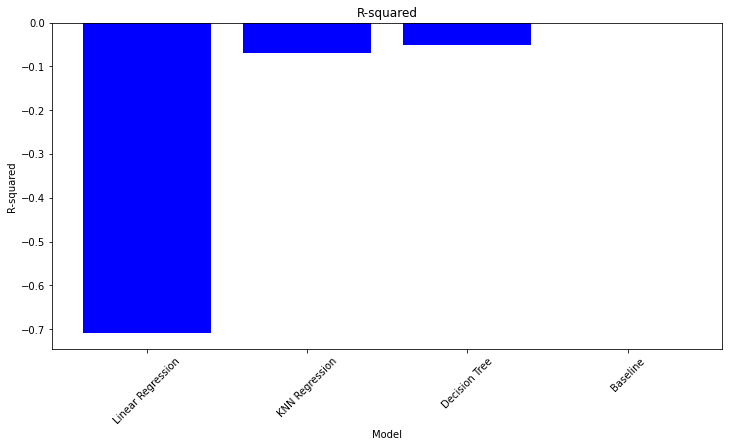

In [ ]:
model_comparison(model_performance_dict, sort_by = 'R-squared', metric = 'R-squared')

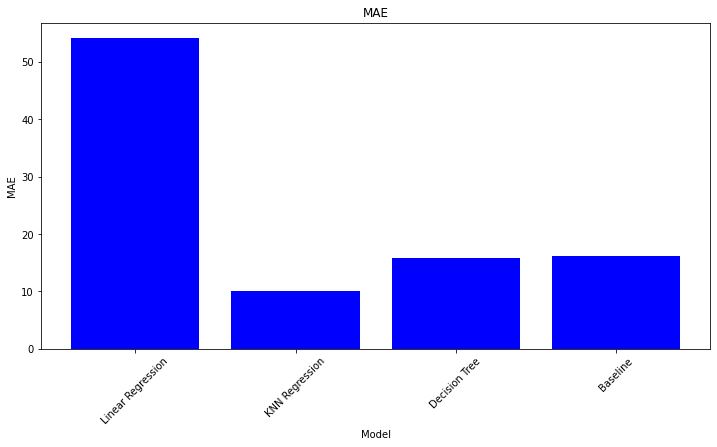

In [ ]:
model_comparison(model_performance_dict, sort_by = 'R-squared', metric = 'MAE')

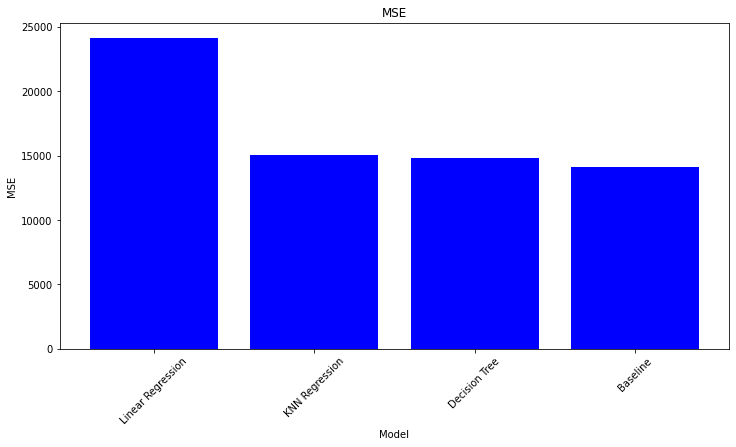

In [ ]:
model_comparison(model_performance_dict, sort_by = 'R-squared', metric = 'MSE')

###**After converting the predicted values that less than zero to zero**


####**Linear Regression Models**

**Baseline model**

In [ ]:
new_model_performance_dict["Baseline"] = new_model_diagnostics(baseline)

R-Sq: -3.896e-05
MSE: 14107.778574982127
MAE: 16.244761662811126


**Linear Regression**

In [ ]:
new_model_performance_dict["Linear Regression"] = new_model_diagnostics(linear)

R-Sq: -0.5624
MSE: 22041.0854482702
MAE: 34.52443996750125


####**Nonlinear Regression Models**



**K-Nearest Neighbor Regression**

In [ ]:
new_model_performance_dict["KNN Regression"] = new_model_diagnostics(knr)

R-Sq: -0.06907
MSE: 15081.609579250719
MAE: 10.165619596541786


**Decision Tree Regression**



In [ ]:
new_model_performance_dict["Decision Tree"] = new_model_diagnostics(dt)

R-Sq: -0.05164
MSE: 14835.774152615293
MAE: 15.792189849222567


####**Model comparison**

We compare the models based on three metrics: R², MAE, and RMSE. To do so, we define the function below.

In [ ]:
def model_comparison(new_model_performance_dict, sort_by = 'MSE', metric = 'MSE'):

    Rsq_list = []
    RMSE_list = []
    MAE_list = []
    for key in new_model_performance_dict.keys():
        Rsq_list.append(new_model_performance_dict[key][0])
        RMSE_list.append(new_model_performance_dict[key][1])
        MAE_list.append(new_model_performance_dict[key][2])

    props = pd.DataFrame([])

    props["R-squared"] = Rsq_list
    props["MSE"] = RMSE_list
    props["MAE"] = MAE_list
    props.index = new_model_performance_dict.keys()
    props = props.sort_values(by = sort_by)

    fig, ax = plt.subplots(figsize = (12,6))

    ax.bar(props.index, props[metric], color="blue")
    plt.title(metric)
    plt.xlabel('Model')
    plt.xticks(rotation = 45)
    plt.ylabel(metric)

Let’s use this function to compare the models based on each metric.

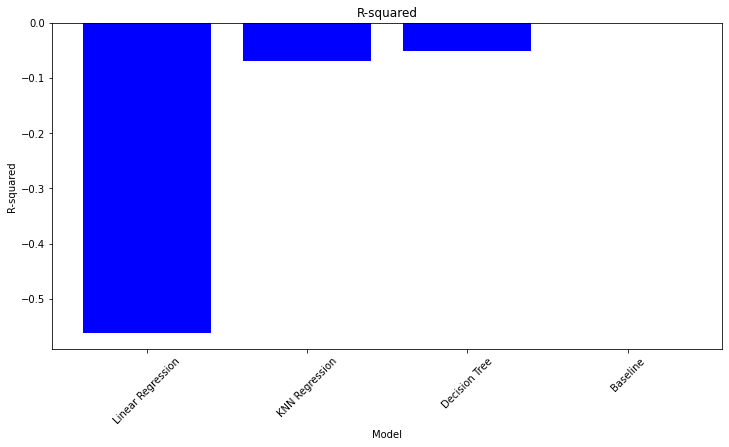

In [ ]:
model_comparison(new_model_performance_dict, sort_by = 'R-squared', metric = 'R-squared')

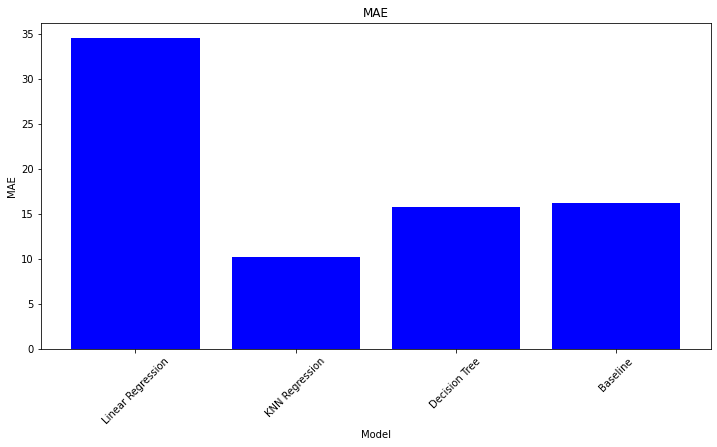

In [ ]:
model_comparison(new_model_performance_dict, sort_by = 'R-squared', metric = 'MAE')

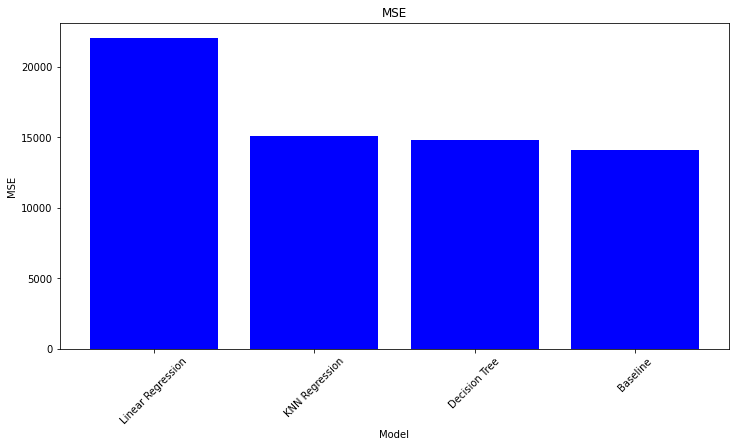

In [ ]:
model_comparison(new_model_performance_dict, sort_by = 'R-squared', metric = 'MSE')

##**Second scenario**


In [ ]:
#replace each empty list in 'reddit_comments' column with np.nan value
#even we can check number of empty record in this column
df['reddit_comments'] = df['reddit_comments'].apply(lambda y: np.nan if len(y)==0 else y)
df

,label,reddit_comments,researched_by,text,title,url
0,0,NaN,snopes,analyze videos growth watch videos growth sinc...,vidinfo,http://www.vidinfo.org/video/67155269/jeremy-m...
1,1,NaN,snopes,last week current administration missed point ...,editorial misinterpreted toon unpatriotic,http://pittnews.com/30440/archives/editorial-m...
2,0,NaN,snopes,email protected member male join date jul 2001...,general health message board,http://www.healthboards.com/boards/general-hea...
3,1,NaN,snopes,urban outfitters sunk new low vintage kent sta...,urban outfitters sorry selling kent state swea...,http://gothamist.com/2014/09/15/urban_outfitte...
4,1,NaN,snopes,santa goes many names santa claus st nick kris...,story santa claus,http://www.englishteachermelanie.com/canada-fu...
...,...,...,...,...,...,...
69391,0,"[{'created_utc': 1370998152, 'label': 0, 'auth...",snopes,donate stuff 101 places clutter good book joy ...,donate stuff 101 places clutter good miss mini...,http://www.missminimalist.com/2011/04/where-to...
69392,0,NaN,snopes,update 3272012 painting depicts obama burning ...,finally obama original birth certificate surfaces,http://geopolitics.co/2012/03/21/finally-obama...
69393,0,NaN,snopes,take selena movie quiz need go back watch movi...,selena quintanilla news 2014,http://loveselena.com/News/2014.html
69394,0,NaN,snopes,robert well know love ya wants love do ray rob...,tropes q z everybody loves raymond,http://tvtropes.org/pmwiki/pmwiki.php/Everybod...


###**Columns preprocessing**

####**reddit_comments**

In [ ]:
#drop missing values from reddit_comments creating new dataframe called(df2)
df3=df.dropna()
df3.head()


,label,reddit_comments,researched_by,text,title,url
14,0,"[{'created_utc': 1344890447, 'label': 0, 'auth...",snopes,comprehensive database us voter fraud uncovers...,news21 2012 national project,http://votingrights.news21.com/article/electio...
21,1,"[{'created_utc': 1383445326, 'label': 1, 'auth...",snopes,megan thompson asked national association chai...,generic drugs necessarily mean low prices,http://www.pbs.org/newshour/bb/health-july-dec...
25,0,"[{'created_utc': 1450314492, 'label': 0, 'auth...",snopes,prosecond amendment protester holds sign readi...,obama admin willing run roughshod constitution...,http://cnsnews.com/commentary/daniel-mitchell/...
29,1,"[{'created_utc': 1357236735, 'label': 1, 'auth...",snopes,miami cbsmiami every time turn lights may putt...,study ecofriendly light bulbs may put health risk,http://miami.cbslocal.com/2013/01/02/study-eco...
36,0,"[{'created_utc': 1398095468, 'label': 0, 'auth...",snopes,something relate to dreaded moment realize sup...,spring cleaning three ways increase computers ...,http://www.cnet.com/how-to/ways-to-increase-yo...


In [ ]:
#extact the bodies & their lengths(number of comments on each news) from reddit_comments column
bodies=[]
lengths =[]
for i in df3.index:
  bodies.append([x['body'] for x in df3['reddit_comments'][i]])
  lengths.append(len([x['body'] for x in df3['reddit_comments'][i]]))
#adding the new columns to the dataframe
df3['bodies']=bodies
df3['lengths']=lengths 

In [ ]:
df3.tail()

,label,reddit_comments,researched_by,text,title,url,bodies,lengths
69357,0,"[{'created_utc': 1419009280, 'label': 0, 'auth...",snopes,close heels obamas pointed comments sony pictu...,obama sony did wrong thing pulled movie,http://www.usatoday.com/story/news/2014/12/19/...,"[hackers watched movie liked it, send sony new...",177
69376,1,"[{'created_utc': 1396451042, 'label': 1, 'auth...",snopes,parents pennsylvania community edge police say...,razor blades found ducttaped playground equipment,http://www.nbcphiladelphia.com/news/local/Razo...,[like incident injuries caused still douche mo...,2
69388,0,"[{'created_utc': 1438088891, 'label': 0, 'auth...",snopes,attack woman france wore bikini public park sp...,muslim girl gang attacks bikini wearing sunbat...,http://www.dailymail.co.uk/news/article-317595...,[mayor reims arnaud robinet said careful jump ...,4
69391,0,"[{'created_utc': 1370998152, 'label': 0, 'auth...",snopes,donate stuff 101 places clutter good book joy ...,donate stuff 101 places clutter good miss mini...,http://www.missminimalist.com/2011/04/where-to...,[great post im hoping obtain minimal lifestyle...,8
69395,0,"[{'created_utc': 1436457724, 'label': 0, 'auth...",snopes,children crayons marketed colorful characters ...,child coloring asbestos,http://www.scientificamerican.com/article/is-y...,"[deleted, whether airborne not exposure asbest...",2


In [ ]:
#remove the unwanted strings and empty bodies(deleted)
unwanted_strings=['       ','        ',""," ","deleted","nan"]
for i in df3.index:
  df3['bodies'][i] = [x for x in df3['bodies'][i] if x not in unwanted_strings]

In [ ]:
#recalculate the number of comments(lengths) after removing the unwanted strings & empty comments(deleted)
for i in df3.index:
  df3['lengths'][i]=len([x for x in df3['bodies'][i]])

In [ ]:
df3.tail()

,label,reddit_comments,researched_by,text,title,url,bodies,lengths
69357,0,"[{'created_utc': 1419009280, 'label': 0, 'auth...",snopes,close heels obamas pointed comments sony pictu...,obama sony did wrong thing pulled movie,http://www.usatoday.com/story/news/2014/12/19/...,"[hackers watched movie liked it, send sony new...",174
69376,1,"[{'created_utc': 1396451042, 'label': 1, 'auth...",snopes,parents pennsylvania community edge police say...,razor blades found ducttaped playground equipment,http://www.nbcphiladelphia.com/news/local/Razo...,[like incident injuries caused still douche mo...,2
69388,0,"[{'created_utc': 1438088891, 'label': 0, 'auth...",snopes,attack woman france wore bikini public park sp...,muslim girl gang attacks bikini wearing sunbat...,http://www.dailymail.co.uk/news/article-317595...,[mayor reims arnaud robinet said careful jump ...,4
69391,0,"[{'created_utc': 1370998152, 'label': 0, 'auth...",snopes,donate stuff 101 places clutter good book joy ...,donate stuff 101 places clutter good miss mini...,http://www.missminimalist.com/2011/04/where-to...,[great post im hoping obtain minimal lifestyle...,7
69395,0,"[{'created_utc': 1436457724, 'label': 0, 'auth...",snopes,children crayons marketed colorful characters ...,child coloring asbestos,http://www.scientificamerican.com/article/is-y...,[whether airborne not exposure asbestos child ...,1


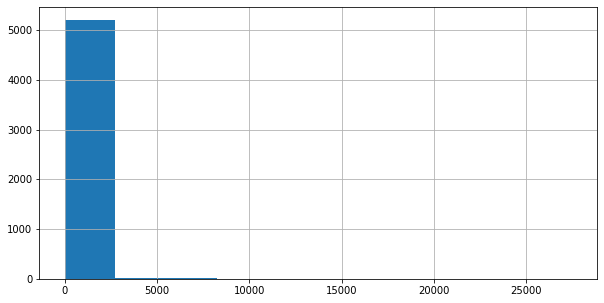

In [ ]:
#display the distribution of number of comments per each news
df3['lengths'].hist();

####**url**


In [ ]:
#The URL parsing functions to split a URL string into its components
from urllib.parse import urlparse
df3['clean_url'] = df3['url'].astype('str').apply(lambda x: urlparse(x)[1])

In [ ]:
#remove the dot character
for i in df3.index:
  df3['clean_url'][i]=df3['clean_url'][i].replace('.' , ' ')
df3['clean_url']

14          votingrights news21 com
21                      www pbs org
25                      cnsnews com
29               miami cbslocal com
36                     www cnet com
                    ...            
69357              www usatoday com
69376       www nbcphiladelphia com
69388           www dailymail co uk
69391        www missminimalist com
69395    www scientificamerican com
Name: clean_url, Length: 5235, dtype: object

####**title**

In [ ]:
#applying the first cleaning function on title column 
#and put the output of this cleaning process in new column("clean_title")
%%time
# Clean text in train data (1.45 s)
df3["clean_title"] = df3.loc[df3["title"].str.len() > 0, "title"]
df3["clean_title"] = df3["clean_title"].map(lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x)
df3['clean_title']=df3['clean_title'].replace(np.nan , " " )

CPU times: user 1.03 s, sys: 537 µs, total: 1.03 s
Wall time: 1.03 s


In [ ]:
df3.head()

,label,reddit_comments,researched_by,text,title,url,bodies,lengths,clean_url,clean_title
14,0,"[{'created_utc': 1344890447, 'label': 0, 'auth...",snopes,comprehensive database us voter fraud uncovers...,news21 2012 national project,http://votingrights.news21.com/article/electio...,[analysis resulting comprehensive news21 elect...,16,votingrights news21 com,news nation project
21,1,"[{'created_utc': 1383445326, 'label': 1, 'auth...",snopes,megan thompson asked national association chai...,generic drugs necessarily mean low prices,http://www.pbs.org/newshour/bb/health-july-dec...,[discovered recently trying get script generic...,2,www pbs org,generic drug necessarili mean low price
25,0,"[{'created_utc': 1450314492, 'label': 0, 'auth...",snopes,prosecond amendment protester holds sign readi...,obama admin willing run roughshod constitution...,http://cnsnews.com/commentary/daniel-mitchell/...,"[isnt, removed, last 7 years man day take ever...",26,cnsnews com,obama admin will run roughshod constitut gun c...
29,1,"[{'created_utc': 1357236735, 'label': 1, 'auth...",snopes,miami cbsmiami every time turn lights may putt...,study ecofriendly light bulbs may put health risk,http://miami.cbslocal.com/2013/01/02/study-eco...,[exposure bulbs could lead premature skin canc...,14,miami cbslocal com,studi ecofriend light bulb may put health risk
36,0,"[{'created_utc': 1398095468, 'label': 0, 'auth...",snopes,something relate to dreaded moment realize sup...,spring cleaning three ways increase computers ...,http://www.cnet.com/how-to/ways-to-increase-yo...,[would amazed read 99],1,www cnet com,spring clean three way increas comput perform


###**Create new DataFrame from our new features**

In [ ]:
#concate the text features that we will use into one column(content column)
train=pd.DataFrame()
df3['content']= df3['researched_by']+' '+df3['clean_title']+ ' '+ df3['clean_url']

In [ ]:
df3.head()

,label,reddit_comments,researched_by,text,title,url,bodies,lengths,clean_url,clean_title,content
14,0,"[{'created_utc': 1344890447, 'label': 0, 'auth...",snopes,comprehensive database us voter fraud uncovers...,news21 2012 national project,http://votingrights.news21.com/article/electio...,[analysis resulting comprehensive news21 elect...,16,votingrights news21 com,news nation project,snopes news nation project votingrights news21...
21,1,"[{'created_utc': 1383445326, 'label': 1, 'auth...",snopes,megan thompson asked national association chai...,generic drugs necessarily mean low prices,http://www.pbs.org/newshour/bb/health-july-dec...,[discovered recently trying get script generic...,2,www pbs org,generic drug necessarili mean low price,snopes generic drug necessarili mean low price...
25,0,"[{'created_utc': 1450314492, 'label': 0, 'auth...",snopes,prosecond amendment protester holds sign readi...,obama admin willing run roughshod constitution...,http://cnsnews.com/commentary/daniel-mitchell/...,"[isnt, removed, last 7 years man day take ever...",26,cnsnews com,obama admin will run roughshod constitut gun c...,snopes obama admin will run roughshod constitu...
29,1,"[{'created_utc': 1357236735, 'label': 1, 'auth...",snopes,miami cbsmiami every time turn lights may putt...,study ecofriendly light bulbs may put health risk,http://miami.cbslocal.com/2013/01/02/study-eco...,[exposure bulbs could lead premature skin canc...,14,miami cbslocal com,studi ecofriend light bulb may put health risk,snopes studi ecofriend light bulb may put heal...
36,0,"[{'created_utc': 1398095468, 'label': 0, 'auth...",snopes,something relate to dreaded moment realize sup...,spring cleaning three ways increase computers ...,http://www.cnet.com/how-to/ways-to-increase-yo...,[would amazed read 99],1,www cnet com,spring clean three way increas comput perform,snopes spring clean three way increas comput p...


These models are the TF-IDF Model, N-Gram Model, Bag of Words Model. These models extract the features from the training data set and then the classifier is trained through these features. 

In [ ]:
"""
Compute unique word vector with frequencies
exclude very uncommon (<10 obsv.) and common (>=40%) words
use pairs of three words (ngram)
and max_features equal to 40000 features
"""
vectorizer_word = TfidfVectorizer( max_features=40000, analyzer="word", max_df=0.4, min_df=10, ngram_range=(1, 3), norm="l2")
X = vectorizer_word.fit_transform(df3['content'])

In [ ]:
X

<5235x1250 sparse matrix of type '<class 'numpy.float64'>'
	with 39621 stored elements in Compressed Sparse Row format>

In [ ]:
#concate the vectorised output and our label(comment length on each news) in one dataframe(df_train)
from scipy.sparse import csr_matrix
df_train = pd.DataFrame.sparse.from_spmatrix(X)
df_train.index=df3.index
df_train['lengths']= df3['lengths']

df_train

,0,1,2,3,4,5,6,7,8,9,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,lengths
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174
69376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


####**Split data**

In [ ]:
X= df_train.iloc[:,:-1]
Y= df_train['lengths']


In [ ]:
# Further split the original training set to a train and a validation set
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 42) 

In [ ]:
print(X_train.shape)
print(X_test.shape)

(4188, 1250)
(1047, 1250)


In [ ]:
print(X_train.shape) 
print(Y_train.shape) 

(4188, 1250)
(4188,)


###**Regression models**

We also define some functions for interacting with the models.

In [ ]:
def model_diagnostics(model, pr=True):
    """
    Returns and prints the R-squared, RMSE and the MAE for a trained model
    """
    y_predicted = model.predict(X_test)
    r2 = r2_score(Y_test, y_predicted)
    mse = mean_squared_error(Y_test, y_predicted)
    mae = mean_absolute_error(Y_test, y_predicted)
    if pr:
        print(f"R-Sq: {r2:.4}")
        print(f"MSE: {mse}")
        print(f"MAE: {mae}")
    
    return [r2,mse,mae]
    
def new_model_diagnostics(model, pr=True):
    """
    Returns and prints the R-squared, RMSE and the MAE for a trained model
    after converting prediction values that less than zero to zero
    """
    y_predicted = model.predict(X_test)
    for i in range(len(y_predicted)):
        if (y_predicted[i]<0):
           y_predicted[i]=0

    r2 = r2_score(Y_test, y_predicted)
    mse = mean_squared_error(Y_test, y_predicted)
    mae = mean_absolute_error(Y_test, y_predicted)
    if pr:
        print(f"R-Sq: {r2:.4}")
        print(f"MSE: {mse}")
        print(f"MAE: {mae}")
    
    return [r2,mse,mae]

def plot_residuals(y_test, y_predicted):
    """"
    Plots the distribution for actual and predicted values of the target variable. Also plots the distribution for the residuals
        * The residual for each observation is the difference between predicted values of y (dependent variable) and observed values of y.
        * Residual=actual y value−predicted y value, ri=yi−^yi.
    """
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)
    sns.distplot(y_test, ax=ax0, kde = False)
    ax0.set(xlabel='Test scores')
    sns.distplot(y_predicted, ax=ax1, kde = False)
    ax1.set(xlabel="Predicted scores")
    plt.show()
    fig, ax2 = plt.subplots()
    sns.distplot((y_test-y_predicted), ax = ax2,kde = False)
    ax2.set(xlabel="Residuals")
    plt.show()
    
def y_test_vs_y_predicted(y_test,y_predicted):
    """
    Produces a scatter plot for the actual and predicted values of the target variable
    """
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_predicted)
    ax.set_xlabel("Test Scores")
    ax.set_ylim([-75, 1400])
    ax.set_ylabel("Predicted Scores")
    plt.show()

**Modeling**

In this section, we use scikit-learn to fit models on the Reddit data. We start with a baseline model, then try to improve results with Lasso, Ridge, and Elastic Net Regression. In addition, we try K-Nearest Neighbors, Decision Tree, Random Forest and Gradient Boosted Regression.

First, let’s define 2 dictionaries that will store the results of the model diagnostics for 2 scenarios.

In [ ]:
#dictionary to save results from our models
model_performance_dict = dict()
#dictionary to save results from our models (after converting prediction values that less than zero)
new_model_performance_dict= dict()

###**Before converting the predicted values that less than zero to zero**

####**Linear Regression Models**

**Baseline model**

We fit a simple model to establish a baseline. This model always predicts the mean number of comments.

In [ ]:
baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train,Y_train)
model_performance_dict["Baseline"] = model_diagnostics(baseline)

R-Sq: -0.0003208
MSE: 247282.69434027863
MAE: 163.42013361503146


**Linear Regression**

In [ ]:
linear = LinearRegression()
linear.fit(X_train,Y_train)
model_performance_dict["Linear Regression"] = model_diagnostics(linear)

R-Sq: -0.7757
MSE: 438954.6274857406
MAE: 327.92770782358355


**Lasso Regression**

In [ ]:
lasso = LassoCV(cv=3).fit(X_train, Y_train)
model_performance_dict["Lasso Regression"] = model_diagnostics(lasso)

R-Sq: -0.0003208
MSE: 247282.69434027863
MAE: 163.42013361503146


**Ridge Regression**



In [ ]:
ridge = RidgeCV(cv=3).fit(X_train, Y_train)
model_performance_dict["Ridge Regression"] = model_diagnostics(ridge)

R-Sq: -0.004842
MSE: 248400.25169706644
MAE: 165.4099508133459


**Elastic Net Regression**

In [ ]:
elastic_net = ElasticNetCV(cv = 3).fit(X_train, Y_train)
model_performance_dict["Elastic Net Regression"] = model_diagnostics(elastic_net)

R-Sq: 0.008596
MSE: 245078.3679268154
MAE: 162.03333866476797


####**Nonlinear Regression Models**



**K-Nearest Neighbor Regression**

In [ ]:
knr = KNeighborsRegressor()
knr.fit(X_train, Y_train)
model_performance_dict["KNN Regression"] = model_diagnostics(knr)

R-Sq: -0.08671
MSE: 268638.83392550144
MAE: 152.24450811843363


**Decision Tree Regression**



In [ ]:
dt = DecisionTreeRegressor(min_samples_split=45, min_samples_leaf=45, random_state = 10)
dt.fit(X_train, Y_train)
model_performance_dict["Decision Tree"] = model_diagnostics(dt)

R-Sq: -0.01846
MSE: 251767.568459277
MAE: 162.65568169395814


**Random Forest Regression**



In [ ]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=1000, min_samples_leaf=10, random_state = 10)
rf.fit(X_train, Y_train)
model_performance_dict["Random Forest"] = model_diagnostics(rf)

R-Sq: -0.02278
MSE: 252835.10101567567
MAE: 165.77209961280764


**Gradient Boosting Regression**



In [ ]:
gbr = GradientBoostingRegressor(n_estimators=70, max_depth=5)
gbr.fit(X_train, Y_train)
model_performance_dict["Gradient Boosting Regression"] = model_diagnostics(gbr)

R-Sq: -0.4543
MSE: 359510.74461671343
MAE: 169.8631361441279


####**Model comparison**

We compare the models based on three metrics: R², MAE, and MSE. To do so, we define the function below.

In [ ]:
def model_comparison(model_performance_dict, sort_by = 'MSE', metric = 'MSE'):

    Rsq_list = []
    RMSE_list = []
    MAE_list = []
    for key in model_performance_dict.keys():
        Rsq_list.append(model_performance_dict[key][0])
        RMSE_list.append(model_performance_dict[key][1])
        MAE_list.append(model_performance_dict[key][2])

    props = pd.DataFrame([])

    props["R-squared"] = Rsq_list
    props["MSE"] = RMSE_list
    props["MAE"] = MAE_list
    props.index = model_performance_dict.keys()
    props = props.sort_values(by = sort_by)

    fig, ax = plt.subplots(figsize = (12,6))

    ax.bar(props.index, props[metric], color="blue")
    plt.title(metric)
    plt.xlabel('Model')
    plt.xticks(rotation = 45)
    plt.ylabel(metric)

Let’s use this function to compare the models based on each metric.

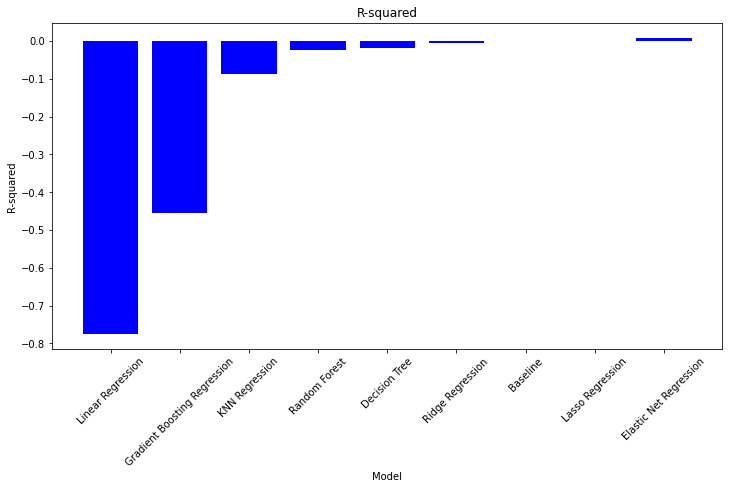

In [ ]:
model_comparison(model_performance_dict, sort_by = 'R-squared', metric = 'R-squared')

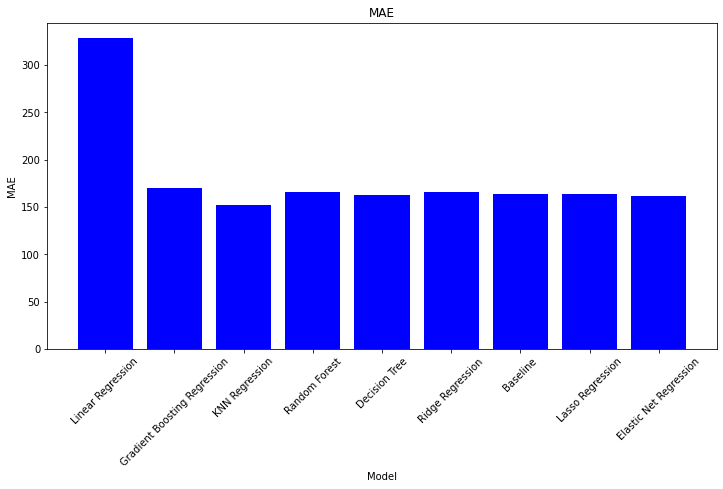

In [ ]:
model_comparison(model_performance_dict, sort_by = 'R-squared', metric = 'MAE')

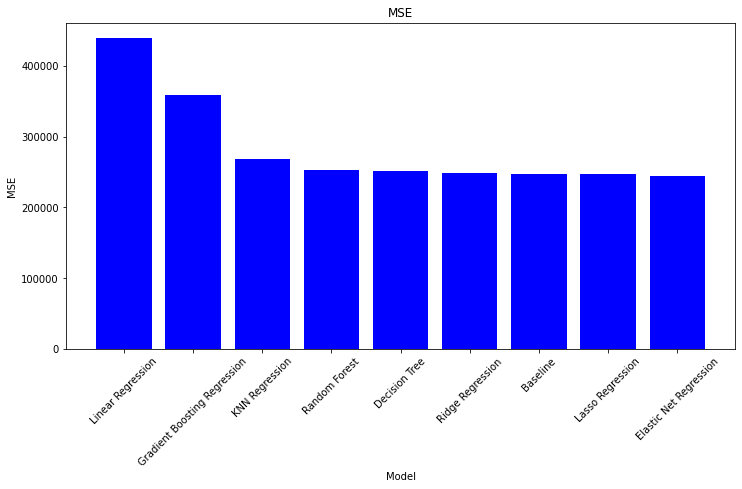

In [ ]:
model_comparison(model_performance_dict, sort_by = 'R-squared', metric = 'MSE')

###**After converting the predicted values that less than zero to zero**


####**Linear Regression Models**

**Baseline model**

In [ ]:
new_model_performance_dict["Baseline"] = new_model_diagnostics(baseline)

R-Sq: -0.0003208
MSE: 247282.69434027863
MAE: 163.42013361503146


**Linear Regression**

In [ ]:
new_model_performance_dict["Linear Regression"] = new_model_diagnostics(linear)

R-Sq: -0.5752
MSE: 389385.56581511605
MAE: 247.46387507538176


**Lasso Regression**

In [ ]:
new_model_performance_dict["Lasso Regression"] = new_model_diagnostics(lasso)

R-Sq: -0.0003208
MSE: 247282.69434027863
MAE: 163.42013361503146


**Ridge Regression**



In [ ]:
new_model_performance_dict["Ridge Regression"] = new_model_diagnostics(ridge)

R-Sq: -0.004719
MSE: 248370.06772367665
MAE: 164.9986527564179


**Elastic Net Regression**

In [ ]:
new_model_performance_dict["Elastic Net Regression"] = new_model_diagnostics(elastic_net)

R-Sq: 0.008596
MSE: 245078.3679268154
MAE: 162.03333866476797


####**Nonlinear Regression Models**



**K-Nearest Neighbor Regression**

In [ ]:
new_model_performance_dict["KNN Regression"] = new_model_diagnostics(knr)

R-Sq: -0.08671
MSE: 268638.83392550144
MAE: 152.24450811843363


**Decision Tree Regression**



In [ ]:
new_model_performance_dict["Decision Tree"] = new_model_diagnostics(dt)

R-Sq: -0.01846
MSE: 251767.568459277
MAE: 162.65568169395814


**Random Forest Regression**



In [ ]:
new_model_performance_dict["Random Forest"] = new_model_diagnostics(rf)

R-Sq: -0.02278
MSE: 252835.10101567567
MAE: 165.77209961280764


**Gradient Boosting Regression**



In [ ]:
new_model_performance_dict["Gradient Boosting Regression"] = new_model_diagnostics(gbr)

R-Sq: -0.4543
MSE: 359510.74461671343
MAE: 169.8631361441279


####**Model comparison**

We compare the models based on three metrics: R², MAE, and MSE. To do so, we define the function below.

In [ ]:
def model_comparison(new_model_performance_dict, sort_by = 'MSE', metric = 'MSE'):

    Rsq_list = []
    RMSE_list = []
    MAE_list = []
    for key in new_model_performance_dict.keys():
        Rsq_list.append(new_model_performance_dict[key][0])
        RMSE_list.append(new_model_performance_dict[key][1])
        MAE_list.append(new_model_performance_dict[key][2])

    props = pd.DataFrame([])

    props["R-squared"] = Rsq_list
    props["MSE"] = RMSE_list
    props["MAE"] = MAE_list
    props.index = new_model_performance_dict.keys()
    props = props.sort_values(by = sort_by)

    fig, ax = plt.subplots(figsize = (12,6))

    ax.bar(props.index, props[metric], color="blue")
    plt.title(metric)
    plt.xlabel('Model')
    plt.xticks(rotation = 45)
    plt.ylabel(metric)

Let’s use this function to compare the models based on each metric.

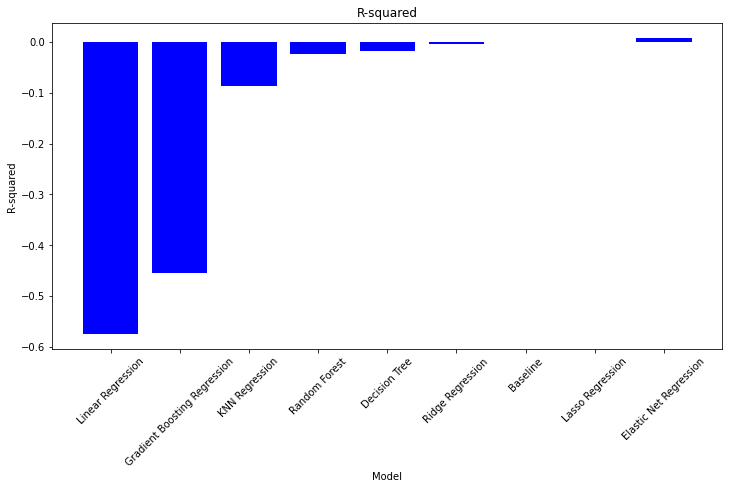

In [ ]:
model_comparison(new_model_performance_dict, sort_by = 'R-squared', metric = 'R-squared')

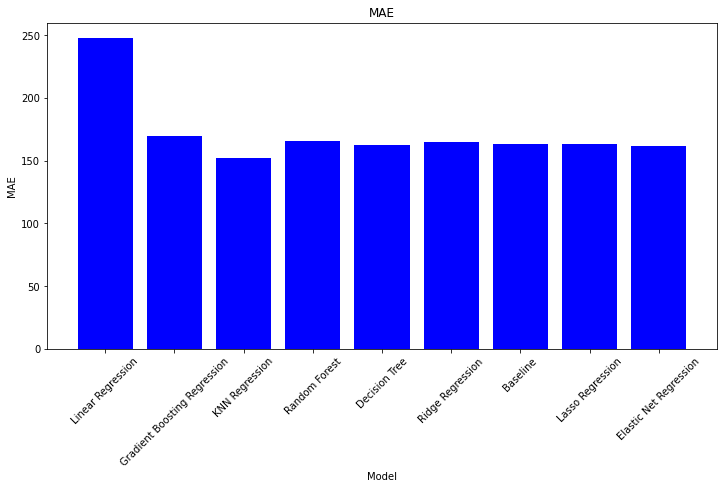

In [ ]:
model_comparison(new_model_performance_dict, sort_by = 'R-squared', metric = 'MAE')

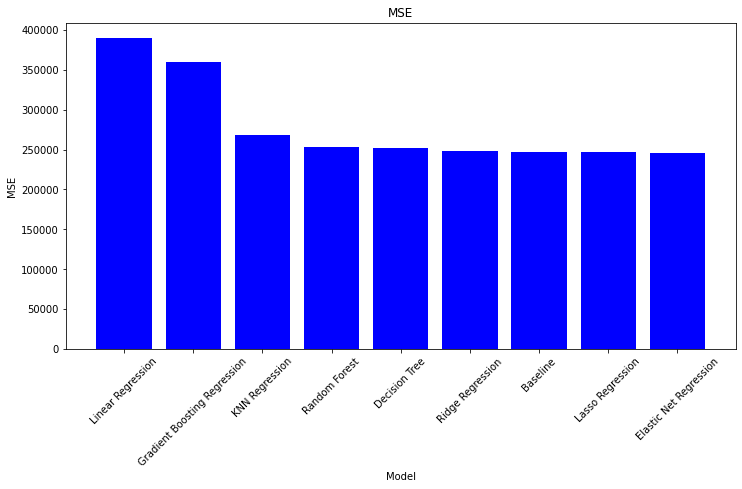

In [ ]:
model_comparison(new_model_performance_dict, sort_by = 'R-squared', metric = 'MSE')

#**3) Predictive Question (Predicting fake news with/without URLs)**

We tried to predict fake news in two different scenarios:

• **1:** predicting it by the some features including the url.

• **2:** predicting it by the same some features but url.

##**First scenario**



###**Prepare Our Data**

In [ ]:
df3.head()

,label,reddit_comments,researched_by,text,title,url,bodies,lengths,clean_url,clean_title,content
14,0,"[{'created_utc': 1344890447, 'label': 0, 'auth...",snopes,comprehensive database us voter fraud uncovers...,news21 2012 national project,http://votingrights.news21.com/article/electio...,[analysis resulting comprehensive news21 elect...,16,votingrights news21 com,news nation project,snopes news nation project votingrights news21...
21,1,"[{'created_utc': 1383445326, 'label': 1, 'auth...",snopes,megan thompson asked national association chai...,generic drugs necessarily mean low prices,http://www.pbs.org/newshour/bb/health-july-dec...,[discovered recently trying get script generic...,2,www pbs org,generic drug necessarili mean low price,snopes generic drug necessarili mean low price...
25,0,"[{'created_utc': 1450314492, 'label': 0, 'auth...",snopes,prosecond amendment protester holds sign readi...,obama admin willing run roughshod constitution...,http://cnsnews.com/commentary/daniel-mitchell/...,"[isnt, removed, last 7 years man day take ever...",26,cnsnews com,obama admin will run roughshod constitut gun c...,snopes obama admin will run roughshod constitu...
29,1,"[{'created_utc': 1357236735, 'label': 1, 'auth...",snopes,miami cbsmiami every time turn lights may putt...,study ecofriendly light bulbs may put health risk,http://miami.cbslocal.com/2013/01/02/study-eco...,[exposure bulbs could lead premature skin canc...,14,miami cbslocal com,studi ecofriend light bulb may put health risk,snopes studi ecofriend light bulb may put heal...
36,0,"[{'created_utc': 1398095468, 'label': 0, 'auth...",snopes,something relate to dreaded moment realize sup...,spring cleaning three ways increase computers ...,http://www.cnet.com/how-to/ways-to-increase-yo...,[would amazed read 99],1,www cnet com,spring clean three way increas comput perform,snopes spring clean three way increas comput p...


In [ ]:
#creating dataframe from our new features
df_new = df3.iloc[:,[0,2,3,5]]
df_new.head()

,label,researched_by,text,url
14,0,snopes,comprehensive database us voter fraud uncovers...,http://votingrights.news21.com/article/electio...
21,1,snopes,megan thompson asked national association chai...,http://www.pbs.org/newshour/bb/health-july-dec...
25,0,snopes,prosecond amendment protester holds sign readi...,http://cnsnews.com/commentary/daniel-mitchell/...
29,1,snopes,miami cbsmiami every time turn lights may putt...,http://miami.cbslocal.com/2013/01/02/study-eco...
36,0,snopes,something relate to dreaded moment realize sup...,http://www.cnet.com/how-to/ways-to-increase-yo...


In [ ]:
#apply Label encoder on researched_by column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_new['researched_by']=le.fit_transform(df_new['researched_by'])
df_new.head()

,label,researched_by,text,url
14,0,2,comprehensive database us voter fraud uncovers...,http://votingrights.news21.com/article/electio...
21,1,2,megan thompson asked national association chai...,http://www.pbs.org/newshour/bb/health-july-dec...
25,0,2,prosecond amendment protester holds sign readi...,http://cnsnews.com/commentary/daniel-mitchell/...
29,1,2,miami cbsmiami every time turn lights may putt...,http://miami.cbslocal.com/2013/01/02/study-eco...
36,0,2,something relate to dreaded moment realize sup...,http://www.cnet.com/how-to/ways-to-increase-yo...


In [ ]:
#use clean function to clean the data in this scenario
df_new["clean_text"] = df_new.loc[df_new["text"].str.len() > 0, "text"]
df_new["clean_text"] = df_new["clean_text"].map(lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x)
df_new["clean_url"] = df_new.loc[df_new["url"].str.len() > 0, "url"]
df_new["clean_url"] = df_new["clean_url"].map(lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x)

In [ ]:
df_new.head()

,label,researched_by,text,url,clean_text,clean_url
14,0,2,comprehensive database us voter fraud uncovers...,http://votingrights.news21.com/article/electio...,comprehens databas us voter fraud uncov evid p...,http votingright news com articl elect fraud
21,1,2,megan thompson asked national association chai...,http://www.pbs.org/newshour/bb/health-july-dec...,megan thompson ask nation associ chain drug st...,http www pbs org newshour bb health juli dec c...
25,0,2,prosecond amendment protester holds sign readi...,http://cnsnews.com/commentary/daniel-mitchell/...,prosecond amend protest hold sign read part sh...,http cnsnew com commentari daniel mitchel obam...
29,1,2,miami cbsmiami every time turn lights may putt...,http://miami.cbslocal.com/2013/01/02/study-eco...,miami cbsmiami everi time turn light may put r...,http miami cbslocal com studi eco friend light...
36,0,2,something relate to dreaded moment realize sup...,http://www.cnet.com/how-to/ways-to-increase-yo...,someth relat dread moment realiz superfast com...,http www cnet com way increas comput perform


In [ ]:
# merging the news text and news title
df_new['content'] = df_new['clean_text']+' '+df_new['clean_url']
df_new['content']

14       comprehens databas us voter fraud uncov evid p...
21       megan thompson ask nation associ chain drug st...
25       prosecond amend protest hold sign read part sh...
29       miami cbsmiami everi time turn light may put r...
36       someth relat dread moment realiz superfast com...
                               ...                        
69357    close heel obama point comment soni pictur ent...
69376    parent pennsylvania communiti edg polic say va...
69388    attack woman franc wore bikini public park spa...
69391    donat stuff place clutter good book joy less t...
69395    children crayon market color charact teenag mu...
Name: content, Length: 5235, dtype: object

In [ ]:
"""
Compute unique word vector with frequencies
exclude very uncommon (<8 obsv.) and common (>=40%) words
use pairs of three words (ngram)
"""
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_word = TfidfVectorizer( max_features=4000, analyzer="word", max_df=0.4, min_df=8, ngram_range=(1, 3), norm="l2")
X = vectorizer_word.fit_transform(df_new["content"])

In [ ]:
from scipy.sparse import csr_matrix
df_train = pd.DataFrame.sparse.from_spmatrix(X)
df_train.index=df_new.index
df_train['researched_by']=df_new['researched_by']
df_train['label']=df_new['label']

df_train

,0,1,2,3,4,5,6,7,8,9,...,3992,3993,3994,3995,3996,3997,3998,3999,researched_by,label
14,0.000000,0.0,0.0,0.0,0.006168,0.0,0.0,0.0,0.016318,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,2,0
21,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,2,1
25,0.000000,0.0,0.0,0.0,0.027331,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.043385,2,0
29,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.041689,0.000000,0.0,0.0,0.000000,2,1
36,0.000000,0.0,0.0,0.0,0.029172,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69357,0.000000,0.0,0.0,0.0,0.012851,0.0,0.0,0.0,0.016999,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,2,0
69376,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,2,1
69388,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.047018,0.0,...,0.072593,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,2,0
69391,0.010657,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.007193,0.0,0.0,0.000000,0.034479,0.0,0.0,0.011182,2,0


**Split data**

In [ ]:
X = df_train.drop(columns='label')
y = df_train['label']
  

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(X,y, random_state=42, test_size=0.2)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(x_train, y_train)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

###**Classification Models**

#### **LogisticRegression**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=)
LR.fit(X_over, y_over)

LogisticRegression()

In [ ]:
#evaluation Details
from sklearn.metrics import f1_score
models = [LR]
for model in models:
    print(type(model).__name__,' Train Score is   : ' ,model.score(X_over, y_over))
    print(type(model).__name__,' Test Score is    : ' ,model.score(x_test, y_test))
    
    y_pred = model.predict(x_test)
    print(type(model).__name__,' F1 Score is      : ' ,f1_score(y_test,y_pred))


LogisticRegression  Train Score is   :  0.8335978236227612
LogisticRegression  Test Score is    :  0.7677616501145913
LogisticRegression  F1 Score is      :  0.3090909090909091


[[937  65]
 [239  68]]


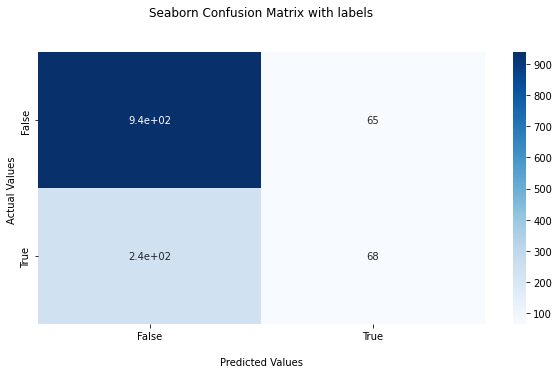

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### **MultinomialNBModel**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
multinomialNBModel = MultinomialNB(alpha=0.1)
multinomialNBModel.fit(X_over, y_over)

MultinomialNB(alpha=0.1)

In [ ]:
#evaluation Details
models = [multinomialNBModel]
for model in models:
    print(type(model).__name__,' Train Score is   : ' ,model.score(X_over, y_over))
    print(type(model).__name__,' Test Score is    : ' ,model.score(x_test, y_test))
    
    y_pred = model.predict(x_test)
    print(type(model).__name__,' F1 Score is      : ' ,f1_score(y_test,y_pred))


MultinomialNB  Train Score is   :  0.7918839265472682
MultinomialNB  Test Score is    :  0.73414820473644
MultinomialNB  F1 Score is      :  0.3307692307692308


[[875 127]
 [221  86]]


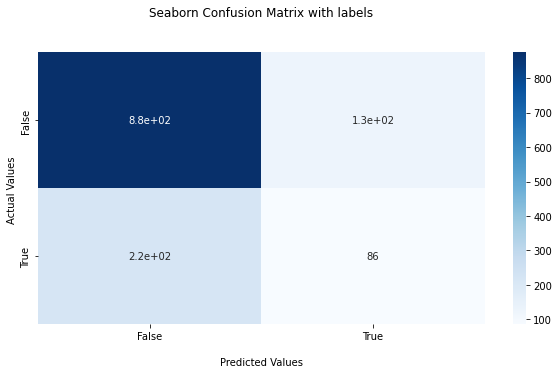

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### **PassiveAggressiveClassifier**

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(C=10)
pac.fit(X_over, y_over)

PassiveAggressiveClassifier(C=10)

In [ ]:
#evaluation Details
models = [pac]
for model in models:
    print(type(model).__name__,' Train Score is   : ' ,model.score(X_over, y_over))
    print(type(model).__name__,' Test Score is    : ' ,model.score(x_test, y_test))
    
    y_pred = model.predict(x_test)
    print(type(model).__name__,' F1 Score is      : ' ,f1_score(y_test,y_pred))

PassiveAggressiveClassifier  Train Score is   :  0.9977329403763319
PassiveAggressiveClassifier  Test Score is    :  0.721161191749427
PassiveAggressiveClassifier  F1 Score is      :  0.38860971524288107


[[828 174]
 [191 116]]


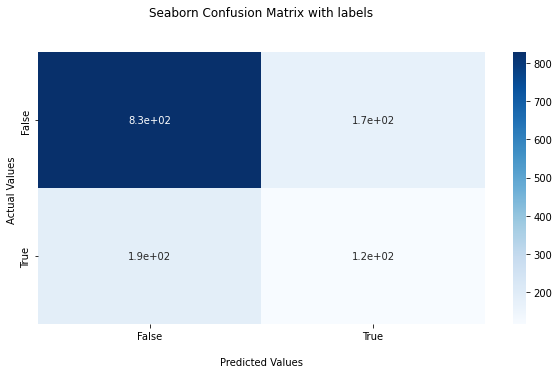

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

####**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=10, random_state=42,n_estimators=500)
RF.fit(X_over, y_over)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)

In [ ]:
#evaluation Details
models = [RF]
for model in models:
    print(type(model).__name__,' Train Score is   : ' ,model.score(X_over, y_over))
    print(type(model).__name__,' Test Score is    : ' ,model.score(x_test, y_test))
    
    y_pred = model.predict(x_test)
    print(type(model).__name__,' F1 Score is      : ' ,f1_score(y_test,y_pred))

RandomForestClassifier  Train Score is   :  0.7485830877352074
RandomForestClassifier  Test Score is    :  0.7669977081741788
RandomForestClassifier  F1 Score is      :  0.012944983818770227


[[1002    0]
 [ 305    2]]


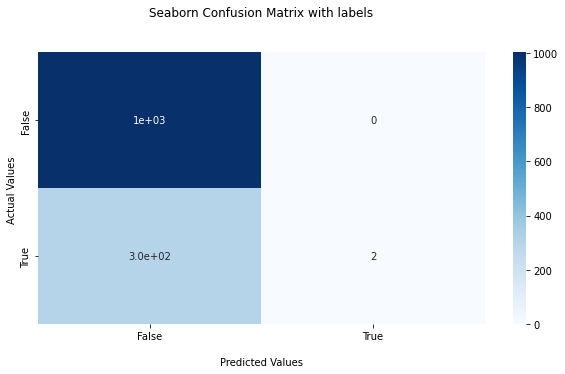

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

##**Second scenario**


###**Data Preprossing**

In [ ]:
df_new=df3.copy()

In [ ]:
df_new["clean_text"] = df_new.loc[df_new["text"].str.len() > 0, "text"]
df_new["clean_text"] = df_new["clean_text"].map(lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x)

In [ ]:
df_new.head()

,label,reddit_comments,researched_by,text,title,url,bodies,lengths,clean_url,clean_title,content,clean_text
14,0,"[{'created_utc': 1344890447, 'label': 0, 'auth...",snopes,comprehensive database us voter fraud uncovers...,news21 2012 national project,http://votingrights.news21.com/article/electio...,[analysis resulting comprehensive news21 elect...,16,votingrights news21 com,news nation project,snopes news nation project votingrights news21...,comprehens databas us voter fraud uncov evid p...
21,1,"[{'created_utc': 1383445326, 'label': 1, 'auth...",snopes,megan thompson asked national association chai...,generic drugs necessarily mean low prices,http://www.pbs.org/newshour/bb/health-july-dec...,[discovered recently trying get script generic...,2,www pbs org,generic drug necessarili mean low price,snopes generic drug necessarili mean low price...,megan thompson ask nation associ chain drug st...
25,0,"[{'created_utc': 1450314492, 'label': 0, 'auth...",snopes,prosecond amendment protester holds sign readi...,obama admin willing run roughshod constitution...,http://cnsnews.com/commentary/daniel-mitchell/...,"[isnt, removed, last 7 years man day take ever...",26,cnsnews com,obama admin will run roughshod constitut gun c...,snopes obama admin will run roughshod constitu...,prosecond amend protest hold sign read part sh...
29,1,"[{'created_utc': 1357236735, 'label': 1, 'auth...",snopes,miami cbsmiami every time turn lights may putt...,study ecofriendly light bulbs may put health risk,http://miami.cbslocal.com/2013/01/02/study-eco...,[exposure bulbs could lead premature skin canc...,14,miami cbslocal com,studi ecofriend light bulb may put health risk,snopes studi ecofriend light bulb may put heal...,miami cbsmiami everi time turn light may put r...
36,0,"[{'created_utc': 1398095468, 'label': 0, 'auth...",snopes,something relate to dreaded moment realize sup...,spring cleaning three ways increase computers ...,http://www.cnet.com/how-to/ways-to-increase-yo...,[would amazed read 99],1,www cnet com,spring clean three way increas comput perform,snopes spring clean three way increas comput p...,someth relat dread moment realiz superfast com...


###**Prepare Model Input**

In [ ]:
"""
Compute unique word vector with frequencies
exclude very uncommon (<8 obsv.) and common (>=40%) words
use pairs of three words (ngram)
"""
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_word = TfidfVectorizer( max_features=40000, analyzer="word", max_df=0.4, min_df=8, ngram_range=(1, 3), norm="l2")
X = vectorizer_word.fit_transform(df_new["clean_text"])

In [ ]:
from scipy.sparse import csr_matrix
df_train = pd.DataFrame.sparse.from_spmatrix(X)
df_train.index=df_new.index
df_train['researched_by']=df_new['researched_by']
df_train['label']=df_new['label']
df_train

,0,1,2,3,4,5,6,7,8,9,...,39992,39993,39994,39995,39996,39997,39998,39999,researched_by,label
14,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,snopes,0
21,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,snopes,1
25,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.032430,0.0,0.0,0.0,0.0,0.0,0.0,snopes,0
29,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,snopes,1
36,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,snopes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69357,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,snopes,0
69376,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,snopes,1
69388,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,snopes,0
69391,0.0,0.0,0.0,0.0,0.0,0.008395,0.0,0.0,0.0,0.0,...,0.0,0.008804,0.0,0.0,0.0,0.0,0.0,0.0,snopes,0


In [ ]:
#Encoding the categorical data
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
df_train['researched_by']= labelencoder_X.fit_transform(df_train['researched_by'])

**Split data**

In [ ]:
X = df_train.drop(columns='label')
y = df_train['label']
  

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,researched_by
14,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2
21,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2
25,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.032430,0.0,0.0,0.0,0.0,0.0,0.0,2
29,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2
36,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69357,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2
69376,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2
69388,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2
69391,0.0,0.0,0.0,0.0,0.0,0.008395,0.0,0.0,0.0,0.0,...,0.0,0.0,0.008804,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(X,y, random_state=42, test_size=0.25)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(x_train, y_train)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

###**Classification Models**

#### **LogisticRegression**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_over, y_over)

LogisticRegression()

In [ ]:
#evaluation Details
from sklearn.metrics import f1_score
models = [LR]
for model in models:
    print(type(model).__name__,' Train Score is   : ' ,model.score(X_over, y_over))
    print(type(model).__name__,' Test Score is    : ' ,model.score(x_test, y_test))
    
    y_pred = model.predict(x_test)
    print(type(model).__name__,' F1 Score is      : ' ,f1_score(y_test,y_pred))


LogisticRegression  Train Score is   :  0.8691906597143505
LogisticRegression  Test Score is    :  0.7807486631016043
LogisticRegression  F1 Score is      :  0.2506527415143603


[[974  28]
 [259  48]]


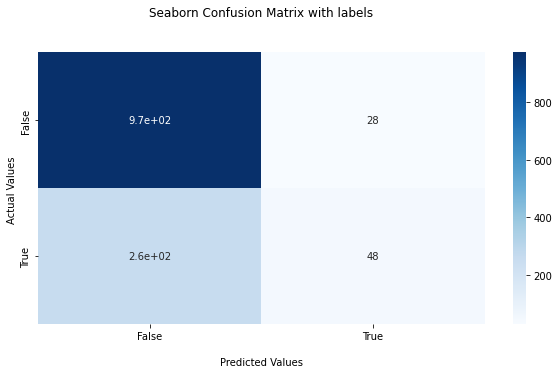

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### **MultinomialNBModel**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
multinomialNBModel = MultinomialNB(alpha=0.1)
multinomialNBModel.fit(X_over, y_over)

MultinomialNB(alpha=0.1)

In [ ]:
#evaluation Details
models = [multinomialNBModel]
for model in models:
    print(type(model).__name__,' Train Score is   : ' ,model.score(X_over, y_over))
    print(type(model).__name__,' Test Score is    : ' ,model.score(x_test, y_test))
    
    y_pred = model.predict(x_test)
    print(type(model).__name__,' F1 Score is      : ' ,f1_score(y_test,y_pred))


MultinomialNB  Train Score is   :  0.929494445703922
MultinomialNB  Test Score is    :  0.7669977081741788
MultinomialNB  F1 Score is      :  0.3813387423935092


[[910  92]
 [213  94]]


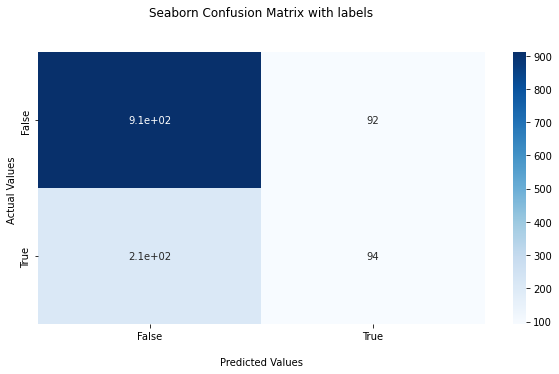

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### **PassiveAggressiveClassifier**

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(C=100)
pac.fit(X_over, y_over)

PassiveAggressiveClassifier(C=100)

In [ ]:
#evaluation Details
from sklearn.metrics import f1_score

models = [pac]
for model in models:
    print(type(model).__name__,' Train Score is   : ' ,model.score(X_over, y_over))
    print(type(model).__name__,' Test Score is    : ' ,model.score(x_test, y_test))
    
    y_pred = model.predict(x_test)
    print(type(model).__name__,' F1 Score is      : ' ,f1_score(y_test,y_pred))

PassiveAggressiveClassifier  Train Score is   :  0.9979596463386987
PassiveAggressiveClassifier  Test Score is    :  0.7708174178762414
PassiveAggressiveClassifier  F1 Score is      :  0.4140625


[[903  99]
 [201 106]]


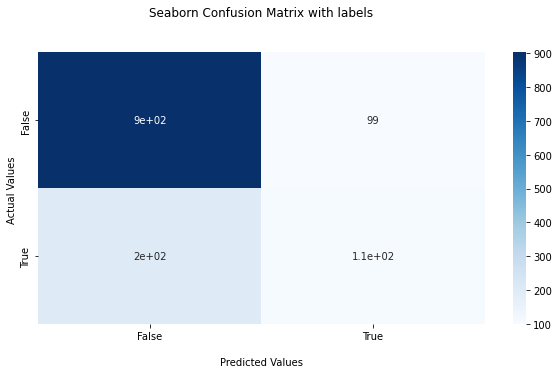

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

####**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=100, random_state=42,n_estimators=500)
RF.fit(X_over, y_over)

RandomForestClassifier(max_depth=500, n_estimators=500, random_state=42)

In [ ]:
#evaluation Details
from sklearn.metrics import f1_score
models = [RF]
for model in models:
    print(type(model).__name__,' Train Score is   : ' ,model.score(X_over, y_over))
    print(type(model).__name__,' Test Score is    : ' ,model.score(x_test, y_test))
    
    y_pred = model.predict(x_test)
    print(type(model).__name__,' F1 Score is      : ' ,f1_score(y_test,y_pred))

RandomForestClassifier  Train Score is   :  0.9984130582634323
RandomForestClassifier  Test Score is    :  0.7700534759358288
RandomForestClassifier  F1 Score is      :  0.06230529595015576


[[998   4]
 [297  10]]


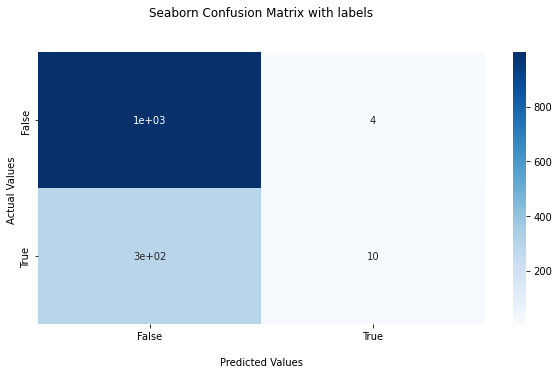

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()